# Exploratory Data Analysis (EDA)

### import librerys 

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [18]:
df = pd.read_csv("C:/Users/HP/10 Acadamy PRojects/New folder (5)/Altdata-lending-risk-model/data\data.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_4648\1881409978.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("C:/Users/HP/10 Acadamy PRojects/New folder (5)/Altdata-lending-risk-model/data\data.csv")


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Dataset Overview & Summary Stats

In [16]:
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [19]:
df.shape

(95662, 16)

In [ ]:
# Identifying Missing Values
df.isnull().sum() / len(df)

TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64

## Numerical Features Distribution

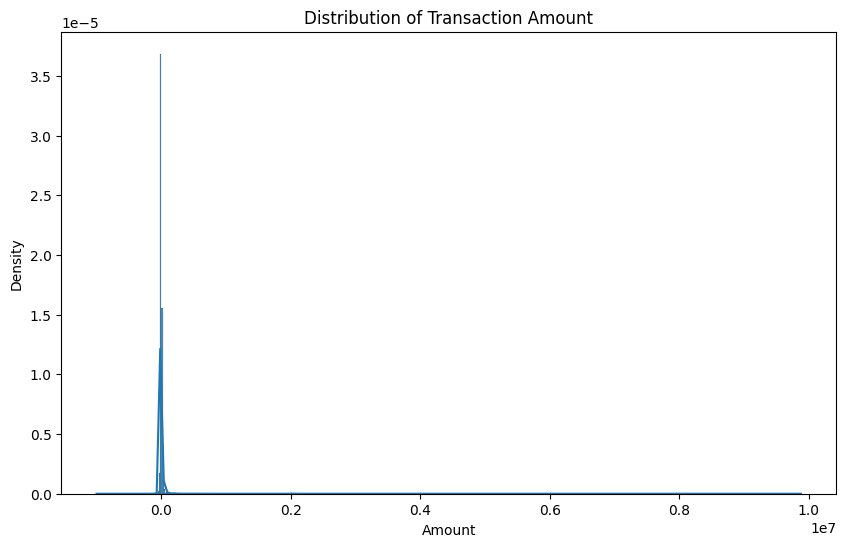

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, stat='density', alpha=0.8)
plt.title('Distribution of Transaction Amount')
plt.show()


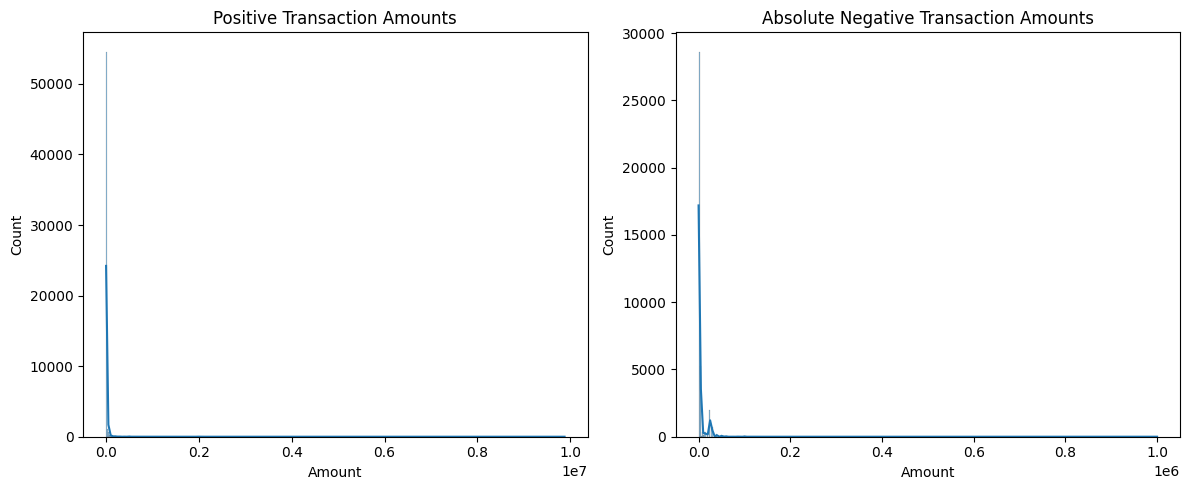

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Amount'] > 0]['Amount'], kde=True)
plt.title('Positive Transaction Amounts')
plt.subplot(1, 2, 2)
sns.histplot(df[df['Amount'] < 0]['Amount'].abs(), kde=True)
plt.title('Absolute Negative Transaction Amounts')
plt.tight_layout()
plt.show()

## Categorical Feature Distribution

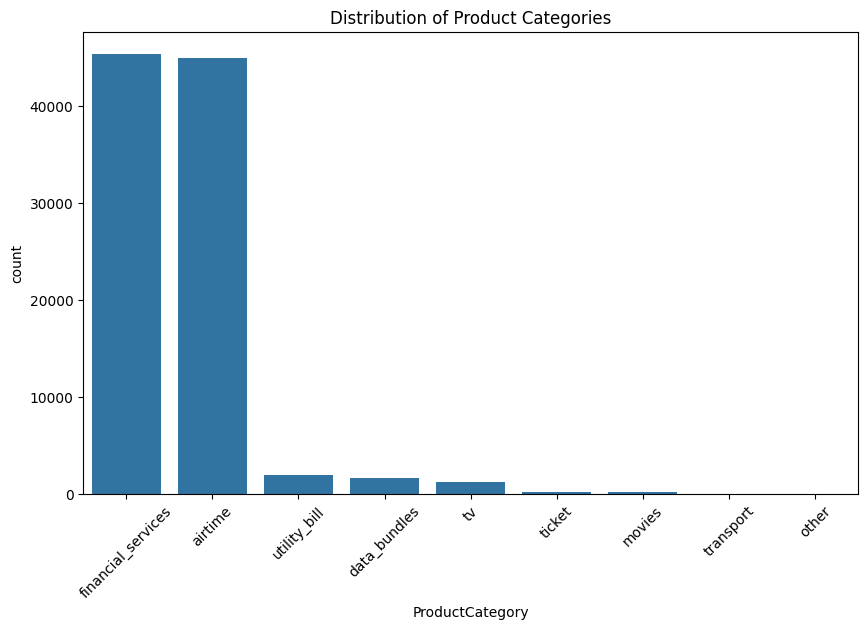

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ProductCategory', order=df['ProductCategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Product Categories')
plt.show()

## Correlation Analysis

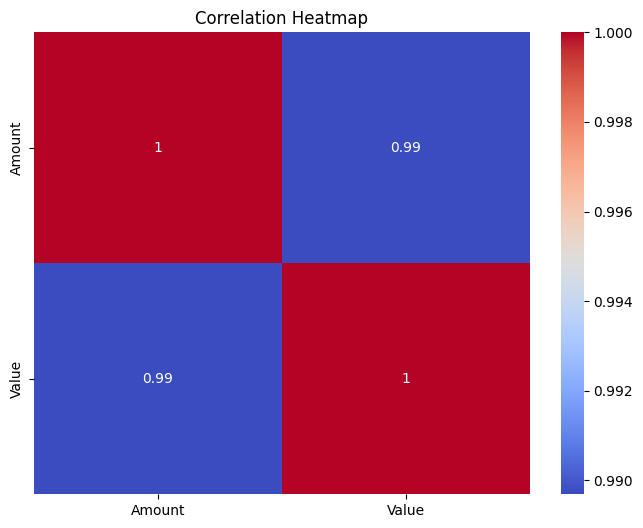

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Amount', 'Value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Outlier Detection

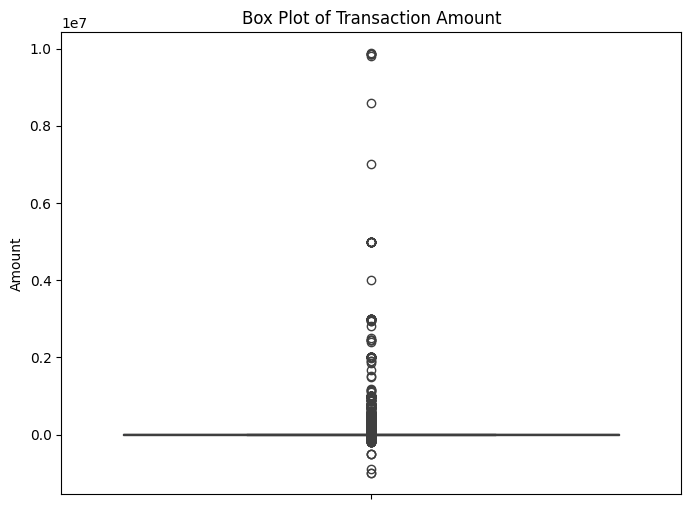

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()

In [47]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'  # Set to use web browser

fig = px.histogram(df, x='Amount', title='Interactive Distribution of Transaction Amount')
fig.show()
